<a href="https://colab.research.google.com/github/tosittig/CASAIS/blob/main/Project_2_Sect_1_Assmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiclass-Image-Classification using CIFAR-100
##Project 2 - Section 1
### List of Tasks

1. Download the CIFAR-100 dataset from the Keras library. You can download it using the following command tf.keras.datasets.cifar100.load_data(). Note that this is a dataset different from CIFAR-10. See more information here.

1. Split the data into training and testing sets.
1. Normalise the pixel values and one-hot encode the labels.
1. Compile, train and evaluate the model. Please note that the selection of hyperparameters as well as the size of the neural network is your own decision.

### Preparation

Import Libraries required for the project:

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Download CIFAR-100 dataset and split it into traing and testing sets



In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 13s 0us/step


Plot and look at some pictures

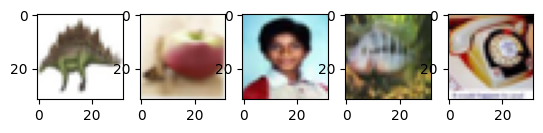

In [3]:
import matplotlib.pyplot as plt

plt.subplot(1, 5, 1)
plt.imshow(X_train[1])
plt.subplot(1, 5, 2)
plt.imshow(X_train[2])
plt.subplot(1, 5, 3)
plt.imshow(X_train[3])
plt.subplot(1, 5, 4)
plt.imshow(X_train[4])
plt.subplot(1, 5, 5)
plt.imshow(X_train[5])

Understand if the categories correspond to the fine labels or coarse labels

In [4]:
y_train[1]

array([29])

How can I get the 100 fine labels from the CIFAR-100 Dataset?

##Normalise pixel values and one-hot encode the labels

###Pre-Process Images

Divide each pixel value in the datasets by 255.0. Since pixel values typically range from 0 to 255 (in the case of 8-bit images), dividing by 255.0 scales the pixel values to the range between 0 and 1. This process effectively normalizes the pixel values to the interval [0, 1].


In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

### One-hot encode Labels

Convert the training labels (y_train) and test labels (y_test) into categorical format using the to_categorical() function from tf.keras.utils module, representing labels in a categorical format, where each label is represented as a one-hot encoded vector.

In [6]:
y_train = tf.keras.utils.to_categorical(y_train,)
y_test = tf.keras.utils.to_categorical(y_test)

##Define the model

Recognize the 100 classes in the CIFAR-100 Dataset (Fine Labels)

In [27]:
#model = tf.keras.Sequential()
#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(MaxPooling2D((2, 2)))

model = tf.keras.Sequential([
     Conv2D(32, (4, 4), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (4, 4), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (4, 4), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (4, 4), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),  # Additional fully connected layer
    Dense(100, activation='softmax')  # 100 classes for CIFAR-100
])

ValueError: Exception encountered when calling layer "max_pooling2d_19" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_19/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,256].

Call arguments received by layer "max_pooling2d_19" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 256), dtype=float32)

Print a summary of the model definition

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         131200    
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 4, 4, 128)        

Compile the Convolutional Nural Network, including a a learning rate of 0.005

In [24]:
optimizer = tf.keras.optimizers.Adam(0.0001)
model.compile(loss='categorical_crossentropy',
               optimizer= optimizer,
               metrics='accuracy')

Implement an early stopping function to prevent the CNN from overfitting

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=3)

Train the model over max 20 epochs

In [26]:
history = model.fit(X_train, y_train, epochs=20,shuffle = True, batch_size = 64, callbacks=[earlyStopping], validation_data=(X_test, y_test))

Epoch 1/20
782/782 [==============================] - 9s 9ms/step - loss: 4.2588 - accuracy: 0.0520 - val_loss: 3.9534 - val_accuracy: 0.0966
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 3.7626 - accuracy: 0.1309 - val_loss: 3.6275 - val_accuracy: 0.1532
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 3.4784 - accuracy: 0.1779 - val_loss: 3.4002 - val_accuracy: 0.1932
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 3.2867 - accuracy: 0.2136 - val_loss: 3.2528 - val_accuracy: 0.2217
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 3.1362 - accuracy: 0.2408 - val_loss: 3.1458 - val_accuracy: 0.2374
Epoch 6/20
782/782 [==============================] - 6s 7ms/step - loss: 3.0087 - accuracy: 0.2625 - val_loss: 3.0442 - val_accuracy: 0.2620
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 2.9079 - accuracy: 0.2817 - val_loss: 2.9747 - val_accuracy: 0.2789
Epoch 

Visualize accuracy and Loss

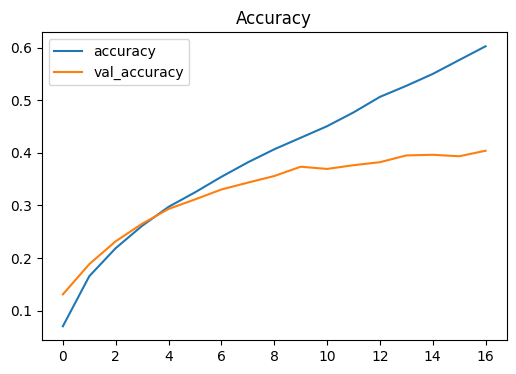

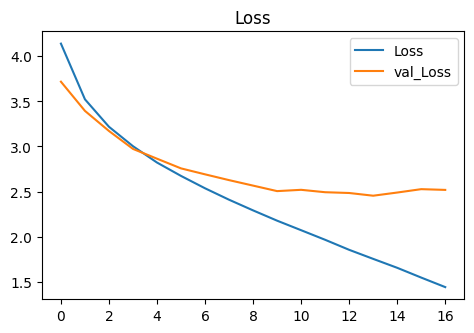

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.legend()